In [36]:
import random
import matplotlib.pyplot as plt
from Ch07HypothesisandInference import *
plt.rcParams['figure.dpi'] = 100

# Hypothesis and Inference

## Statistical Hypothesis Testing

## Example: Flipping a Coin

In [3]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, .5)

In [4]:
lower_bound, upper_bound = normal_two_sided_bounds(.95, mu_0, sigma_0)
lower_bound, upper_bound

(469.01026640487555, 530.9897335951244)

In [5]:
lo, hi = normal_two_sided_bounds(.95, mu_0, sigma_0)

In [6]:
mu_1, sigma_1 = normal_approximation_to_binomial(1000, .55)
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability
power

0.8865480012953671

In [7]:
hi = normal_upper_bound(.95, mu_0, sigma_0)
hi

526.0073585242053

In [8]:
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability

## p-Values

In [9]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [10]:
two_sided_p_value(526.5, mu_0, sigma_0)

0.09373679017718484

## Confidence Intervals

In [11]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
normal_two_sided_bounds(.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

In [12]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
normal_two_sided_bounds(.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

## p-Hacking

In [13]:
random.seed(0)

# List[list]
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])
assert num_rejections == 46

## Example: Running an A/B Test

In [14]:
z = a_b_test_statistics(1000, 200, 1000, 180)
z

-1.140339987989934

In [15]:
two_sided_p_value(z)

0.2541446842808215

which is large enough that we can’t conclude there’s much of a difference.

In [16]:
z = a_b_test_statistics(1000, 200, 1000, 150)
two_sided_p_value(z)

0.0031898791977279517

which means there’s only a 0.003 probability we’d see such a large difference if the ads were equally effective.

## Bayesian Inference

For example, when the unknown parameter is a probability (as in our coin-flipping example), we often use a prior from the Beta distribution, which puts all its probability between 0 and 1:

Generally speaking, this distribution centers its weight at:

$$\frac{alpha}{alpha+beta}$$

and the larger alpha and beta are, the “tighter” the distribution is.

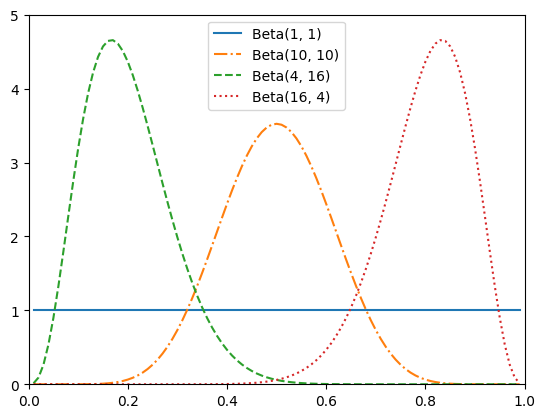

In [37]:
xs = [x / 100 for x in range(1, 100)]
plt.plot(xs, [beta_pdf(x, alpha=1, beta=1) for x in xs], '-', label='Beta(1, 1)')
plt.plot(xs, [beta_pdf(x, alpha=10, beta=10) for x in xs], '-.', label='Beta(10, 10)')
plt.plot(xs, [beta_pdf(x, alpha=4, beta=16) for x in xs], '--', label='Beta(4, 16)')
plt.plot(xs, [beta_pdf(x, alpha=16, beta=4) for x in xs], ':', label='Beta(16, 4)')
plt.axis([0, 1, 0, 5])
plt.legend()
plt.show()

For example, if alpha and beta are both 1, it’s just the uniform distribution (centered at 0.5, very dispersed). If alpha is much larger than beta, most of the weight is near 1. And if alpha is much smaller than beta, most of the weight is near 0.